In [103]:
import numpy as np 
import pandas as pd

from sklearn import preprocessing, cross_validation, metrics
%pylab inline
from scipy.sparse import hstack, csr_matrix 
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [ ]:
rs = 19683

work_dir = '/media/maesh/Charming/Documents/Kaggle/2016/expedia/'

trainfile = work_dir + 'train_parsed_booking_drop.csv'
testfile = work_dir + 'test_parsed_booking_drop.csv'

df_train = pd.read_csv(trainfile) # in both, dfs have negative values for trip len?
df_test = pd.read_csv(testfile)

count    3.000693e+06
mean     3.129063e+02
std      2.044980e+02
min      0.000000e+00
25%      1.740000e+02
50%      3.140000e+02
75%      3.950000e+02
max      1.027000e+03
Name: user_location_region, dtype: float64


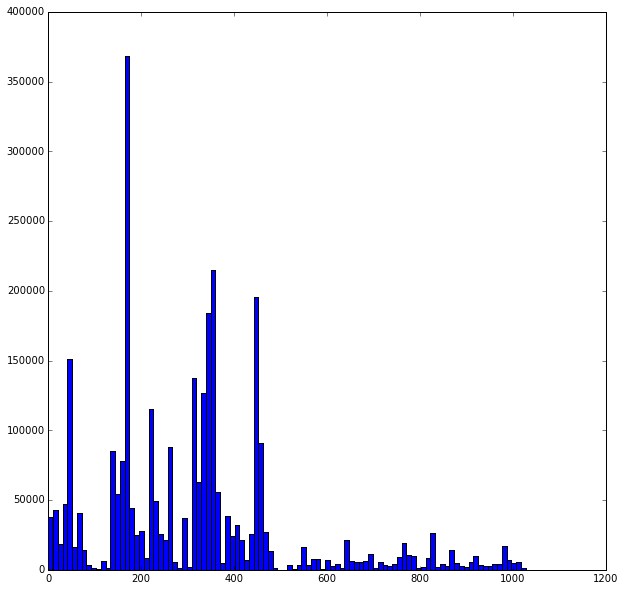

In [6]:
print(df_train['user_location_region'].describe())
plt.figure(figsize=(10,10))
plt.hist(df_train['user_location_region'],bins=100)
plt.show()

Over 1000 possibilities, may be best to just drop it.

In [164]:
hc_group = df_train['hotel_cluster'].groupby(df_train['srch_destination_id'])
# hc_group_vcs = hc_group['hotel_cluster'].value_counts()

In [165]:
hc_group

In [160]:
df_train['hotel_cluster'].value_counts()[:5].index.get_values()

array([91, 48, 42, 59, 28])

In [59]:
np.sum(df_train['srch_destination_id']==8250)

97678

Go ahead and try to make a submission

In [178]:
submit = pd.DataFrame()

def makespace(x):    
    return " ".join([str(int(z)) for z in x])
    
def get_hc(x) :
    return x.value_counts()[:5].index.get_values()

# Top 5 hotels overall, for test srch destinations not in train
top5_generic = makespace(df_train['hotel_cluster'].value_counts()[:5].index.get_values())

def apply_to_test(x):
    # Take IDs from test and return appropriate values
    try :
        return hotlist[x]
    except :
        return top5_generic
    
start = datetime.now()

# Group the training set by srch destination id
hc_group = df_train['hotel_cluster'].groupby(df_train['srch_destination_id'])

# Get the top 5 values for each
hotels = hc_group.apply(get_hc)

# Make it into a list
hotlist = hotels.apply(makespace)

# Parse out test IDs
idx = df_test['id'].values

# Make Submission
submit['id'] = idx
submit['hotel_cluster'] = df_test['srch_destination_id'].apply(apply_to_test)

print("%s"%(datetime.now() - start))

# df['postTestScore'].groupby(df['categories']).apply(get_stats).unstack()
# for i, idx in enumerate(df_test['id'].values) :
#     submit['id'][i] = idx
#     sd_idx = df_test[df_test['id']==idx]['srch_destination_id'].values[0]
#     try :
#         # top 5 hotel clusters for specific srch_destination_id
#         hotels = hc_group.get_group(sd_idx)['hotel_cluster'].value_counts()[:5].index.get_values()
#     except KeyError:
#         # if we don't know search destination hotel cluster, just guess top 5 overall
#         hotels = df_train['hotel_cluster'].value_counts()[:5].index.get_values()
#     submit['hotel_cluster'] = makespace(hotels)
#     if i % 100000 == 0:
#         print("%s\t%s"%(i, datetime.now() - start))

0:00:30.081077


In [180]:
submit.to_csv(work_dir+'top5.srch_dest_ids.2016.04.21.csv',header=True,index=False)

In [179]:
submit

,id,hotel_cluster
0,0,55 37 5 22 11
1,1,91 48 42 59 28
2,2,0 31 77 91 59
3,3,1 45 79 24 54
4,4,91 2 42 59 48
5,5,91 42 28 95 4
6,6,95 2 21 98 33
7,7,95 98 18 68 91
8,8,1 45 79 24 54
9,9,55 32 34 10 4


In [181]:
df_test['srch_destination_id'][2528234]

15246

In [182]:
hotlist[15246]

'59 81 77 87 62'